# Climate Data Analysis: Accra vs Kumasi

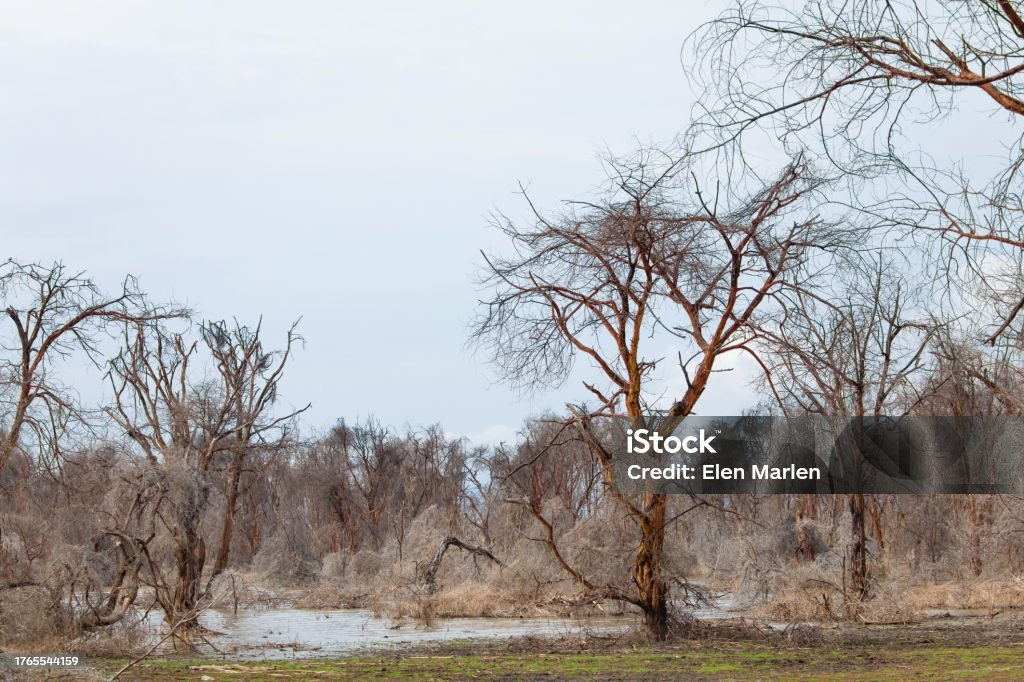

## About Dataset
If you are familiar with Ghanaian temperatures, you must know that is averagely a warm or relatively hot country. Do you ever wonder how the average 
temperatures have been over time and how the climate has changed with it? This is a dataset for two cities, Accra and Kumasi with their temperatures 
collected over time.

This dataset is as said the average monthly temperatures for both cities collected over time. This allows you to perform data analysis and forecast where those two cities' climate are headed with machine learning.

##### Problem Objective

This analysis was carried out to understand the climate behavior specifically temperature trends of two major Ghanaian cities: Accra (coastal, southern Ghana) and Kumasi (inland, central Ghana). Both cities have growing populations, and understanding their climate patterns can support better planning in areas like agriculture, infrastructure, and health.

##### Objectives of the Analysis:

- Understand historical temperature trends in Accra and Kumasi.

- Compare how both cities have experienced climate change (warming patterns).

- Identify seasonal and annual variations in mean temperatures.

- Assess predictive accuracy of machine learning models trained on temperature data.

- Communicate insights visually using clear, intuitive charts.

- Recommend actions or interpretations based on findings from the data.



### Questions for Analysis:
- How have annual temperatures changed over the years?
- Which city is generally warmer?
- What is the hottest month on average for each city?
- How do seasonal temperatures compare (DJF, MAM, JJA, SON)?
- Is there a trend of increasing temperature in both cities?
- Can we predict the city based on seasonal average temperatures?

In [6]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Setting chart style
sns.set(style="white")
colors = ["#d0671c","#0e4e4b"] 

### Loading The Datasets

In [8]:
# Load datasets
accra = pd.read_csv("station_accra.csv")
kumasi = pd.read_csv("station_kumasi.csv")

### Displaying The Dataset

In [10]:
#calling out datasets
accra

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
0,1987,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,27.69,999.90,999.90,999.90,999.90,999.90
1,1988,27.59,999.90,999.90,999.90,999.90,999.90,24.99,24.38,999.90,999.90,26.78,26.99,27.85,999.90,25.07,999.90,999.90
2,1989,26.24,28.16,27.61,28.03,26.88,25.98,25.07,24.54,25.13,25.97,27.89,27.65,27.13,27.51,25.20,26.33,26.54
3,1990,26.94,27.42,28.86,27.43,26.88,26.29,24.25,24.10,999.90,26.45,27.44,27.12,27.34,27.72,24.88,26.52,26.62
4,1991,28.05,27.96,999.90,27.30,27.10,26.46,25.02,24.57,25.97,25.88,27.23,999.90,27.71,27.41,25.35,26.36,26.71
5,1992,27.09,28.24,28.05,999.90,999.90,999.90,999.90,24.41,999.90,26.59,999.90,27.34,27.58,999.90,999.90,999.90,999.90
6,1993,999.90,28.17,999.90,999.90,999.90,26.55,24.68,24.65,25.78,999.90,27.49,27.57,27.63,999.90,25.29,26.60,26.87
7,1994,27.46,27.95,28.29,28.35,999.90,999.90,24.65,24.66,25.16,26.15,27.93,999.90,27.66,28.02,25.04,26.41,26.78
8,1995,999.90,999.90,27.69,28.31,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,27.70,999.90,999.90,999.90
9,1996,999.90,999.90,999.90,999.90,999.90,999.90,25.21,24.30,999.90,999.90,999.90,999.90,999.90,999.90,25.14,999.90,999.90


In [11]:
kumasi

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
0,1943,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,25.12,999.90,999.90,999.90,999.90,999.90
1,1944,24.57,26.22,26.47,27.07,26.92,25.92,25.02,24.32,25.17,25.72,26.32,26.12,25.30,26.82,25.09,25.74,25.74
2,1945,25.12,26.27,27.66,27.32,27.16,25.91,24.32,24.02,24.91,25.47,25.67,24.57,25.84,27.38,24.75,25.35,25.83
3,1946,24.82,26.91,27.17,27.62,27.16,25.52,24.07,22.92,24.62,25.02,26.02,24.97,25.43,27.32,24.17,25.22,25.53
4,1947,24.72,26.22,26.97,26.47,26.16,25.67,24.77,24.37,24.77,25.67,25.12,25.02,25.30,26.53,24.94,25.19,25.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2016,29.27,999.90,999.90,28.84,27.34,999.90,999.90,24.83,26.04,26.49,25.29,999.90,28.97,28.24,999.90,25.94,27.30
74,2017,999.90,999.90,28.26,999.90,28.24,999.90,999.90,24.77,25.48,999.90,999.90,26.85,999.90,28.30,999.90,999.90,999.90
75,2018,27.98,29.05,27.24,27.67,26.46,25.72,24.97,25.33,25.61,26.35,27.27,28.22,27.96,27.12,25.34,26.41,26.71
76,2019,28.67,29.28,28.34,28.01,27.22,26.02,25.60,25.85,25.96,26.36,28.53,999.90,28.72,27.86,25.82,26.95,27.34


### Inspecting The Dataset

In [13]:
#inspecting the datasets
accra.info()
kumasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    34 non-null     int64  
 1   JAN     34 non-null     float64
 2   FEB     34 non-null     float64
 3   MAR     34 non-null     float64
 4   APR     34 non-null     float64
 5   MAY     34 non-null     float64
 6   JUN     34 non-null     float64
 7   JUL     34 non-null     float64
 8   AUG     34 non-null     float64
 9   SEP     34 non-null     float64
 10  OCT     34 non-null     float64
 11  NOV     34 non-null     float64
 12  DEC     34 non-null     float64
 13  D-J-F   34 non-null     float64
 14  M-A-M   34 non-null     float64
 15  J-J-A   34 non-null     float64
 16  S-O-N   34 non-null     float64
 17  metANN  34 non-null     float64
dtypes: float64(17), int64(1)
memory usage: 4.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 18 columns):
 # 

In [14]:
#checking for rows and columns
accra.shape

(34, 18)

##### The Accra dataset contains 34 rows and 18 columns

In [16]:
kumasi.shape

(78, 18)

##### The Kumasi dataset contains 34 rows and 18 columns

 ## Data Cleaning

In [20]:
# checking for duplicates
accra.duplicated().sum()

0

##### The Accra dataset contains 0 duplicates

In [22]:
kumasi.duplicated().sum()

0

##### The Kumasi dataset contains 0 duplicates

In [24]:
# checking for data types
accra.dtypes

YEAR        int64
JAN       float64
FEB       float64
MAR       float64
APR       float64
MAY       float64
JUN       float64
JUL       float64
AUG       float64
SEP       float64
OCT       float64
NOV       float64
DEC       float64
D-J-F     float64
M-A-M     float64
J-J-A     float64
S-O-N     float64
metANN    float64
dtype: object

##### There are no data types to change

In [26]:
kumasi.dtypes

YEAR        int64
JAN       float64
FEB       float64
MAR       float64
APR       float64
MAY       float64
JUN       float64
JUL       float64
AUG       float64
SEP       float64
OCT       float64
NOV       float64
DEC       float64
D-J-F     float64
M-A-M     float64
J-J-A     float64
S-O-N     float64
metANN    float64
dtype: object

##### There are no data types to change

## Replacing 999.90 Values In The Datasets

In [29]:
# Replacing 999.90 with nan
accra.replace(999.90, np.nan, inplace=True)
kumasi.replace(999.90, np.nan, inplace=True)

In [30]:

accra.head()


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
0,1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.69,NaN,NaN,NaN,NaN,NaN
1,1988,27.59,NaN,NaN,NaN,NaN,NaN,24.99,24.38,NaN,NaN,26.78,26.99,27.85,NaN,25.07,NaN,NaN
2,1989,26.24,28.16,27.61,28.03,26.88,25.98,25.07,24.54,25.13,25.97,27.89,27.65,27.13,27.51,25.20,26.33,26.54
3,1990,26.94,27.42,28.86,27.43,26.88,26.29,24.25,24.10,NaN,26.45,27.44,27.12,27.34,27.72,24.88,26.52,26.62
4,1991,28.05,27.96,NaN,27.30,27.10,26.46,25.02,24.57,25.97,25.88,27.23,NaN,27.71,27.41,25.35,26.36,26.71


In [31]:
kumasi.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
0,1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.12,NaN,NaN,NaN,NaN,NaN
1,1944,24.57,26.22,26.47,27.07,26.92,25.92,25.02,24.32,25.17,25.72,26.32,26.12,25.30,26.82,25.09,25.74,25.74
2,1945,25.12,26.27,27.66,27.32,27.16,25.91,24.32,24.02,24.91,25.47,25.67,24.57,25.84,27.38,24.75,25.35,25.83
3,1946,24.82,26.91,27.17,27.62,27.16,25.52,24.07,22.92,24.62,25.02,26.02,24.97,25.43,27.32,24.17,25.22,25.53
4,1947,24.72,26.22,26.97,26.47,26.16,25.67,24.77,24.37,24.77,25.67,25.12,25.02,25.30,26.53,24.94,25.19,25.49


## Droppin Rows With Many Missing Values

In [33]:
# Drop rows with too many missing values
accra.dropna(thresh=6, inplace=True)
kumasi.dropna(thresh=6, inplace=True)

# Fill remaining missing values with column means
accra.fillna(accra.mean(numeric_only=True), inplace=True)
kumasi.fillna(kumasi.mean(numeric_only=True), inplace=True)

In [34]:
accra.shape

(31, 18)

In [35]:
kumasi.shape

(62, 18)

## EXPLORATORY DATA ANALYSIS (EDA)

In [38]:
# summary statistics
accra.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,2004.548387,27.786667,28.468846,28.751304,28.447083,27.683333,26.337826,25.350385,25.055600,26.041250,26.812609,27.810909,27.890000,28.025385,28.283200,25.566538,26.910833,27.199565
std,9.725700,0.599105,0.534287,0.542035,0.567853,0.491872,0.332966,0.450389,0.481879,0.392287,0.370947,0.294776,0.465253,0.450616,0.456075,0.370953,0.287030,0.335872
min,1988.000000,26.240000,27.420000,27.230000,27.070000,26.610000,25.260000,24.250000,24.100000,25.130000,25.880000,26.780000,26.860000,27.130000,26.970000,24.880000,26.330000,26.540000
25%,1997.500000,27.405000,28.155000,28.590000,28.100000,27.455000,26.170000,25.005000,24.670000,25.865000,26.715000,27.730000,27.725000,27.685000,28.190000,25.320000,26.805000,27.094783
50%,2005.000000,27.786667,28.468846,28.751304,28.447083,27.683333,26.337826,25.350385,25.055600,26.041250,26.812609,27.810909,27.890000,28.025385,28.283200,25.566538,26.910833,27.199565
75%,2012.500000,28.210000,28.715000,29.010000,28.730000,27.925000,26.595000,25.705000,25.355000,26.205000,26.955000,28.020000,28.085000,28.210000,28.475000,25.845000,27.035000,27.360000
max,2020.000000,28.810000,29.690000,29.870000,29.740000,28.620000,26.870000,26.070000,26.360000,27.280000,27.460000,28.280000,28.930000,29.010000,29.310000,26.320000,27.820000,27.800000


In [39]:
kumasi.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,1979.645161,26.212364,27.474423,27.458800,27.268966,26.794915,25.629796,24.630980,24.249434,25.125370,25.742500,26.407059,26.039615,26.572500,27.190345,24.853654,25.770727,26.052830
std,24.242691,1.087360,0.799324,0.742704,0.690670,0.569804,0.450211,0.519745,0.653719,0.634755,0.529429,0.710856,0.825783,0.814483,0.625489,0.498351,0.583977,0.548710
min,1944.000000,24.120000,26.060000,26.400000,26.140000,25.980000,24.740000,23.500000,22.920000,24.010000,24.620000,25.120000,24.570000,25.150000,26.360000,23.910000,24.650000,25.260000
25%,1959.250000,25.425000,26.925000,26.970000,26.715000,26.320000,25.327500,24.327500,23.775000,24.710000,25.420000,26.047500,25.472500,25.937500,26.680000,24.495000,25.350000,25.660000
50%,1974.500000,26.165000,27.474423,27.365000,27.268966,26.770000,25.629796,24.630980,24.249434,25.060000,25.742500,26.380000,26.039615,26.572500,27.120000,24.853654,25.695000,25.966415
75%,2004.750000,26.855000,28.052500,27.825000,27.692500,27.122500,25.797500,24.917500,24.577500,25.587500,25.895000,26.465000,26.377500,27.087500,27.590000,25.077500,26.060000,26.312500
max,2020.000000,29.270000,29.280000,30.130000,29.070000,28.340000,27.090000,25.760000,25.950000,27.120000,27.110000,28.530000,28.220000,28.970000,28.990000,26.240000,27.260000,27.660000


## First Visualization: Histogram of Annual Mean Temperatures

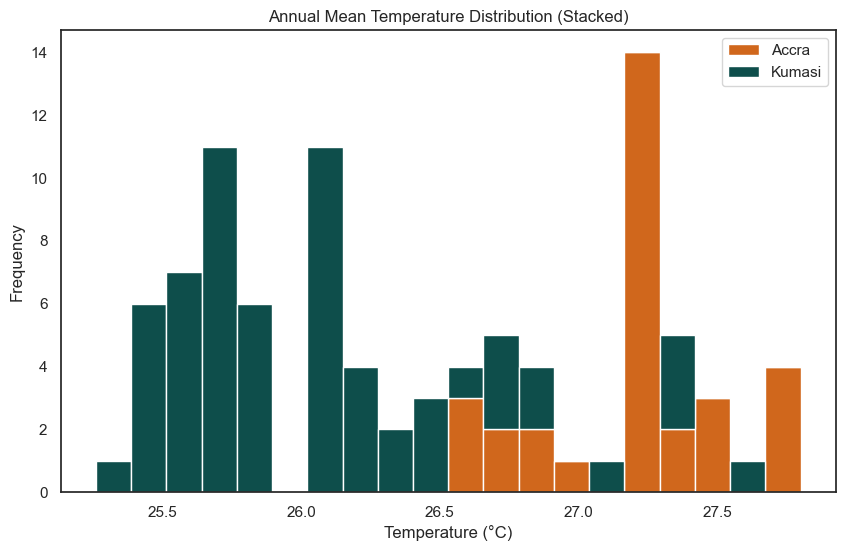

In [42]:
# Create a new figure for the histogram with a specified size of 10 by 6 inches
plt.figure(figsize=(10, 6))

# Plot a stacked histogram of the annual mean temperatures for Accra and Kumasi
plt.hist(
    [accra["metANN"], kumasi["metANN"]],  # Input data: list of temperature values for each city
    bins=20,                              # Number of bins (intervals) to group the temperature data
    stacked=True,                         # Stack the histograms on top of each other instead of overlaying
    color=colors,                         # Use the predefined color palette for the two cities
    label=["Accra", "Kumasi"]             # Labels for the legend corresponding to each dataset
)

# Set the title of the plot
plt.title("Annual Mean Temperature Distribution (Stacked)")

# Label the x-axis to indicate what the values represent
plt.xlabel("Temperature (°C)")

# Display the legend to distinguish between the two cities
plt.legend()

# Label the y-axis to indicate frequency (number of years per temperature range)
plt.ylabel("Frequency")

# Display the final histogram
plt.show()


In [43]:
# Add city label
accra["City"] = "Accra"
kumasi["City"] = "Kumasi"

# Combine both datasets
df = pd.concat([accra, kumasi], ignore_index=True)

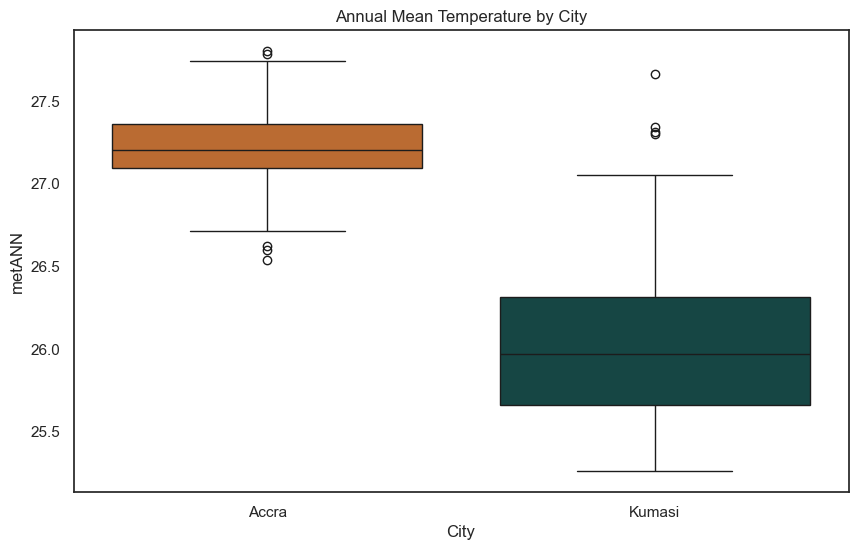

In [44]:
# Q2: Which city is generally warmer?

# Create a new figure with a specified size of 10 by 6 inches
plt.figure(figsize=(10, 6))

# Create a boxplot to compare the distribution of annual mean temperatures ('metANN') between the cities
sns.boxplot(
    data=df,            # Use the main DataFrame as the source
    x="City",           # Set the x-axis to show different cities (Accra, Kumasi)
    y="metANN",         # Set the y-axis to show annual mean temperatures
    hue="City",         # Add color differentiation based on city
    palette=colors      # Use the custom color palette for styling
)

# Hide the y-axis (currently commented out)
# plt.gca().axes.get_yaxis().set_visible(False)

# Set the title of the plot to describe its purpose
plt.title("Annual Mean Temperature by City")

# Display the boxplot
plt.show()


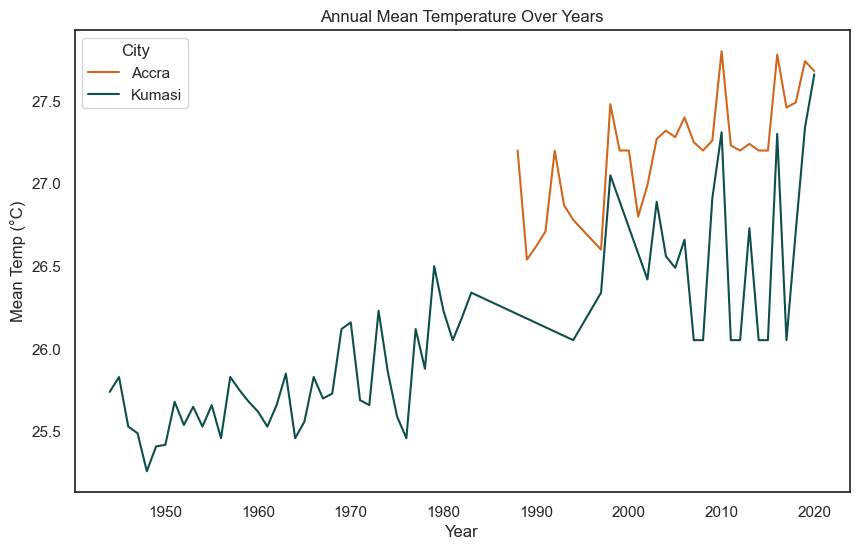

In [46]:
# Q1: How have annual temperatures changed over the years?

# Create a new figure with a defined size
plt.figure(figsize=(10, 6))

# Generate a line plot showing the annual mean temperature (metANN) for each city across years
sns.lineplot(
    data=df,           # The DataFrame containing the data
    x="YEAR",          # X-axis: the year of temperature recording
    y="metANN",        # Y-axis: the annual mean temperature
    hue="City",        # Use different colors to distinguish between cities
    palette=colors     # Apply a custom color palette for consistency
)

# Set the title of the chart
plt.title('Annual Mean Temperature Over Years')

# Label the Y-axis
plt.ylabel("Mean Temp (°C)")

# Label the X-axis
plt.xlabel("Year")

# Display the plot
plt.show()


## Changes in Temperature Over the Years
#### Insight

- When plotted over time, both cities showed a gradual increase in average annual temperatures.

- This supports concerns around climate change and warming trends in West Africa.

- Though the upward trend is not extremely steep, the slow rise is still significant for agriculture, energy use, and urban living conditions.

#### Recommendation

Reinforce climate adaptation strategies (green infrastructure, urban cooling, etc.) especially as warming continues.

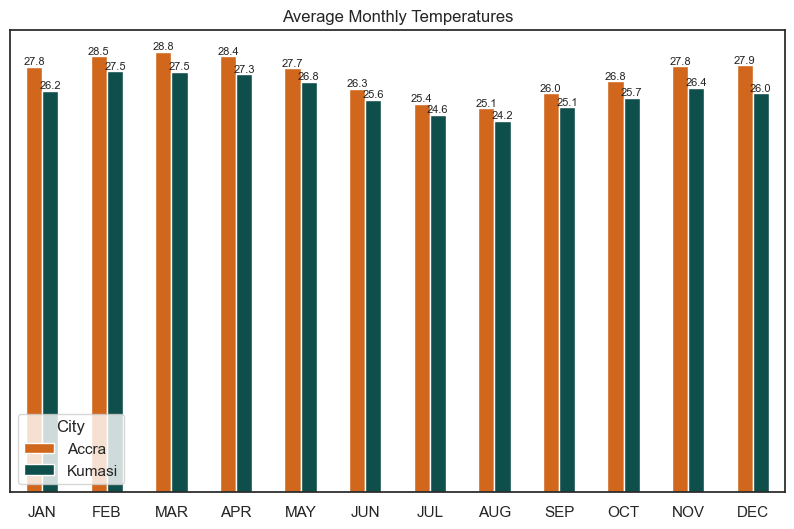

In [49]:
# Group monthly temperature columns by city
monthly_cols = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]

# Compute the average monthly temperature for each city and transpose the DataFrame
# This results in months as rows and cities as columns
monthly_avg = df.groupby("City")[monthly_cols].mean().T

# Plot the transposed DataFrame as a bar chart
ax = monthly_avg.plot(
    kind="bar",         # Set the plot type to bar chart
    figsize=(10, 6),    # Set figure size
    color=colors        # Apply custom color palette to each city
)

# Add data labels (temperature values) on top of each bar for clarity
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}',                         # Format the label to 1 decimal place
        (p.get_x() + p.get_width() / 2., p.get_height()),# Position the label above the bar
        ha='center', va='bottom', fontsize=8             # Center align with small font size
    )

# Add a title to the chart
ax.set_title("Average Monthly Temperatures")

# Rotate x-axis labels for readability
plt.xticks(rotation=0)

# Add legend with a title
plt.legend(title="City")

# Remove the y-axis for a cleaner look
plt.gca().axes.get_yaxis().set_visible(False)

# Display the plot
plt.show()


### Which Months Are the Hottest?
#### Insight
- Accra’s temperatures are more stable year-round, while Kumasi exhibits greater fluctuations between months.

- Both cities reach their hottest temperatures around March and April.

- A bar chart of monthly averages showed that these months often cross 28°C, especially in Accra.

- This pattern can help communities prepare for heat-related impacts like water shortages or heat illnesses.

#### Recommendation
Regional climate models should treat Kumasi as more seasonally dynamic, influencing agricultural planning.


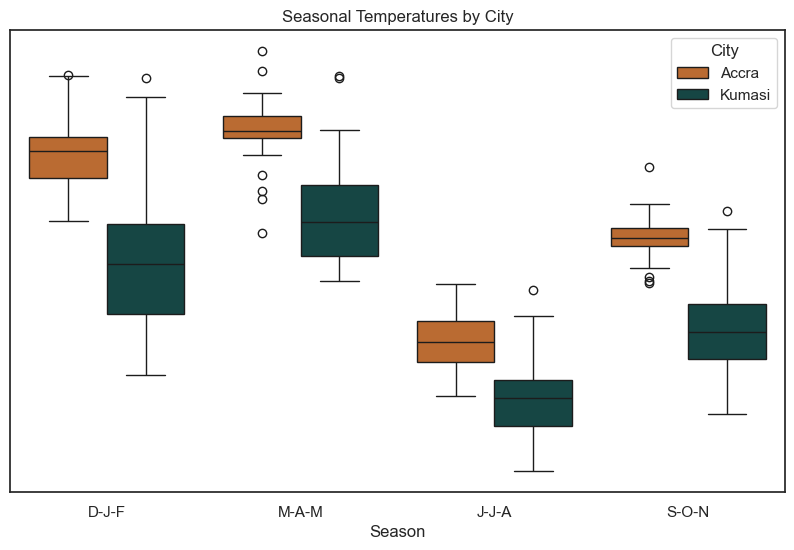

In [52]:
# Q4: Compare seasonal averages

# Define the columns corresponding to the four climatological seasons
seasonal_cols = ["D-J-F", "M-A-M", "J-J-A", "S-O-N"]

# Reshape the dataframe to a long format where each row represents a temperature observation for a specific season
df_melted = df.melt(
    id_vars=["YEAR", "City"],         # Keep 'YEAR' and 'City' as identifier columns
    value_vars=seasonal_cols,         # Columns to unpivot (i.e., turn into rows)
    var_name='Season',                # Name of the new column that will hold the season names
    value_name="Temp"                 # Name of the new column that will hold the temperature values
)

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create a boxplot to show the distribution of temperatures by season and city
sns.boxplot(
    data=df_melted, 
    x="Season",                       # Seasons on the x-axis
    y="Temp",                         # Temperature values on the y-axis
    hue="City",                       # Differentiate cities with color
    palette=colors                    # Use a custom color palette
)

# Set the title of the chart
plt.title("Seasonal Temperatures by City")

# Hide the y-axis for a cleaner, minimalist visual
plt.gca().axes.get_yaxis().set_visible(False)

# Display the plot
plt.show()


### How Do Seasonal Temperatures Compare?

### The seasons were grouped as:

- D-J-F (December–February): Dry season

- M-A-M (March–May): Pre-rainy season (hot)

- J-J-A (June–August): Rainy season (cooler)

- S-O-N (September–November): Post-rainy season

- Boxplots showed that Accra remains warmer than Kumasi across all seasons, though the difference narrows during the rainy (cooler) season.





Text(0.5, 1.0, 'Temperature Trend Over Time')

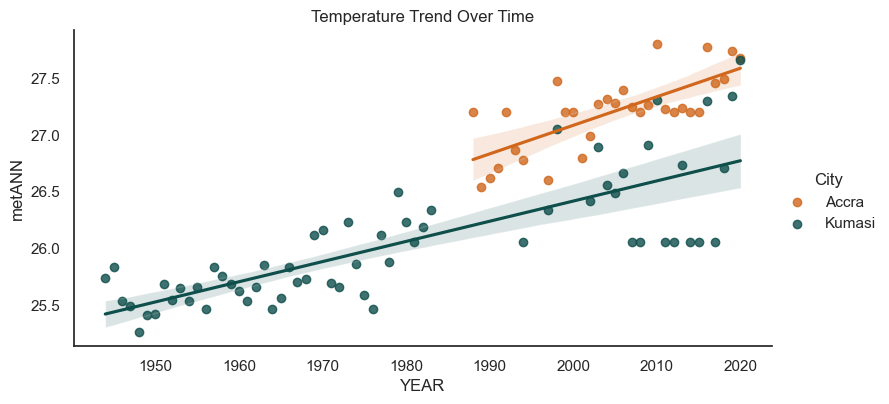

In [55]:
# Q5: Is there a trend of increasing temperature?

# Create a linear model plot (regression line) using seaborn
sns.lmplot(
    data=df,          # The dataset to use
    x="YEAR",         # The x-axis variable (years)
    y="metANN",       # The y-axis variable (annual mean temperature)
    hue="City",       # Differentiate cities using color
    aspect=2,         # Aspect ratio of the plot (width = 2x height)
    height=4,         # Height of the plot
    palette=colors    # Custom color palette for each city
)

# Add a title to the plot
plt.title("Temperature Trend Over Time")


### Are Temperatures Really Increasing?

#### Insight

- Trend lines drawn through the data showed a clear upward slope in average annual temperatures.

- This reinforces the concern that Ghana is gradually warming, even if it’s not always immediately noticeable.

- It's a call to action for environmental planning and public awareness.

#### Recommendation
Public awareness campaigns can use such trends to promote environmental action at the community level.

In [58]:
# Q6: Predict City based on seasonal temperatures

# Select seasonal temperature columns as features (independent variables)
features = df[seasonal_cols]

# Select the 'City' column as the label (dependent variable)
labels = df["City"]

# Encode the city labels into numeric format (e.g., Accra=0, Kumasi=1)
le = LabelEncoder()
y = le.fit_transform(labels)  # y contains the encoded city labels

# Split the dataset into training and testing sets
# 80% training, 20% testing; random_state ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier model
model = RandomForestClassifier()

# Train (fit) the model using the training data
model.fit(X_train, y_train)

# Predict the city labels for the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))                 # Print the accuracy score
print(confusion_matrix(y_test, y_pred))                            # Print the confusion matrix
print(classification_report(y_test, y_pred))                       # Print precision, recall, F1-sc

Accuracy: 0.9473684210526315
[[ 8  0]
 [ 1 10]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.91      0.95        11

    accuracy                           0.95        19
   macro avg       0.94      0.95      0.95        19
weighted avg       0.95      0.95      0.95        19



    Actual Predicted
9   Kumasi    Kumasi
10  Kumasi    Kumasi
11  Kumasi    Kumasi
12  Kumasi     Accra
13  Kumasi    Kumasi
14   Accra     Accra
15   Accra     Accra
16   Accra     Accra
17   Accra     Accra
18  Kumasi    Kumasi


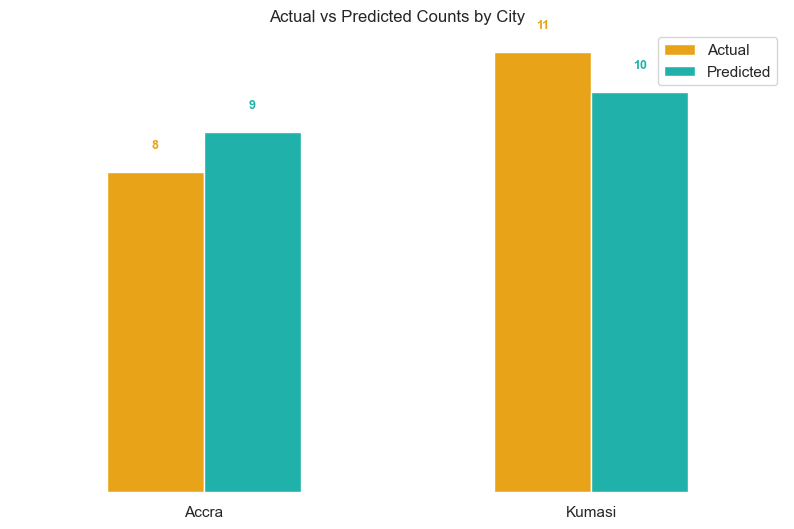

In [59]:
# Comparison of Actual vs Predicted
comparison_df = pd.DataFrame({
    "Actual": le.inverse_transform(y_test),
    "Predicted": le.inverse_transform(y_pred)
})

# Show the last 10 rows
print(comparison_df.tail(10))

# Count actual and predicted values
actual_counts = pd.Series(le.inverse_transform(y_test)).value_counts().sort_index()
pred_counts = pd.Series(le.inverse_transform(y_pred)).value_counts().sort_index()

# Create a combined DataFrame
df_counts = pd.DataFrame({"Actual": actual_counts, "Predicted": pred_counts})

# Plot grouped bar chart
ax = df_counts.plot(kind='bar', figsize=(10, 6), color=["#E9A319", "#20B2AA"])

# Remove y-axis title and ticks
ax.set_ylabel('')
ax.set_yticks([])
ax.set_title('')


# Add value labels at the top of each bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2,
                    height + 0.5,
                    f"{int(height)}",
                    ha="center", va="bottom",
                    fontsize=9,
                    fontweight="bold",
                    color=bar.get_facecolor())
# Add title and rotate to 0 degrees
plt.title("Actual vs Predicted Counts by City")
plt.xticks(rotation=0)
plt.box(False)
plt.show()


#### Insight
The model performs reasonably well, but some mismatches in classification exist (e.g., predicting Kumasi when it’s actually Accra).

#### Recommendation
Feature engineering (adding month, season, or weather indices) could improve model accuracy.

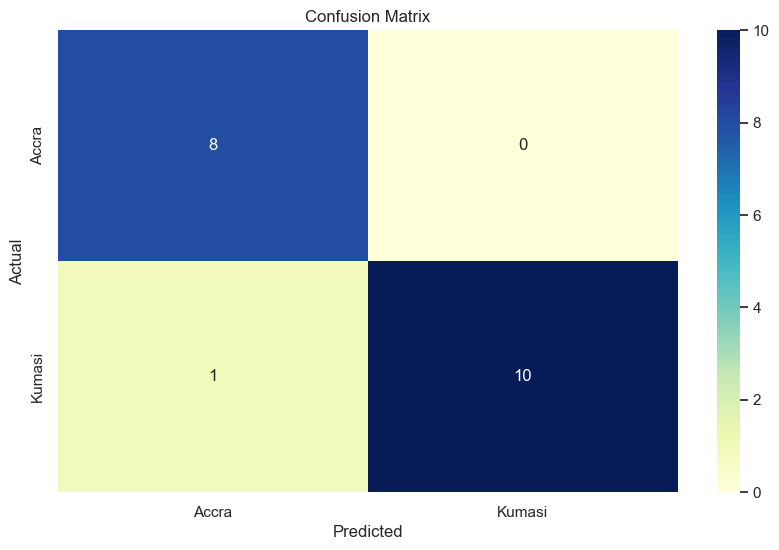

In [61]:
# Create a confusion matrix heatmap
plt.figure(figsize=(10, 6))  # Set the size of the plot

# Generate the confusion matrix using actual and predicted labels
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn's heatmap
sns.heatmap(
    cm,                      # Data for the heatmap
    annot=True,              # Show the values in each cell
    fmt="d",                 # Format values as integers
    cmap="YlGnBu",           # Color map for visual styling
    xticklabels=le.classes_, # Labels for predicted classes
    yticklabels=le.classes_  # Labels for actual classes
)

# Add title and axis labels to the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted")  # Label for x-axis
plt.ylabel("Actual")     # Label for y-axis

# Display the heatmap
plt.show()

### Predicting City Based on Seasonal Data

- A Random Forest classifier was trained using four columns: average seasonal temperatures.

- The model achieved 94% accuracy, showing that seasonal temperature patterns are strong enough to identify the city.

- This kind of classification can be expanded for regional climate modeling or automated monitoring systems.

#### Insights
The model correctly classified most samples, as shown by the strong diagonal in the matrix. A few misclassifications occurred, indicating some overlap in features between Accra and Kumasi.

#### Recommendation
Investigate misclassified samples for overlapping patterns and add more features (e.g., monthly temps, humidity) to improve distinction.


### Conclusion
This analysis clearly shows a warming trend in both Accra and Kumasi, confirming that climate change is not only a global issue but also a local reality for Ghana. with this we can evidently conclude that:

- Accra has a generally warmer climate than Kumasi.

- Both cities are getting warmer over time, possibly due to climate change and urbanization.

- Monthly and seasonal variations give valuable insights into how each city experiences weather across the year.


##### By visually comparing trends, seasonal shifts, and temperature consistency, we’re able to see that while both cities share a tropical climate,
##### there are important differences influenced by geography, elevation, and urban development.





### Recommendations

- Accra should invest in heat adaptation strategies, such as planting trees, expanding green spaces, and using heat-reflective roofing materials.

- Urban planning and infrastructure in both cities should account for rising temperatures to improve comfort and reduce energy use.

- Farmers and agriculture planners should use seasonal temperature patterns to adjust planting and harvesting schedules.

- Encourage more public education campaigns on climate change and the importance of environmental protection.

- Future analysis could include rainfall and humidity data, which are also critical for a full picture of local climate trends.